<a href="https://colab.research.google.com/github/HORPLYNO/SVM-Cat-vs-Dog-Classifier/blob/main/image_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive')  # Mount Google Drive

Mounted at /content/drive


In [ ]:

import zipfile

zip_path = "/content/drive/My Drive/Dataset.zip"
extract_path = "/content/extracted_folder"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

Files extracted to: /content/extracted_folder


In [ ]:
# List files in the extracted folder
files = os.listdir(extract_path)
print("Extracted files:", files)

Extracted files: ['Dataset']


In [ ]:
dataset_path = os.path.join(extract_path, "Dataset")  # Update the path
files_inside = os.listdir(dataset_path)
print("Files inside dataset folder:", files_inside)


Files inside dataset folder: ['Dog', 'Cat']


##<b> Step 1: Import the necessary libraries <b/>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## HOG Feature Extraction Function

In [ ]:
def extract_hog_features(img_path):
    try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            return None  # Skip unreadable images

        img = cv2.resize(img, (64, 64))  # Resize to size 64
        features, _ = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        return features
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None


In [ ]:
X = []
y = []

# paths to datasets

cat_path = "/content/extracted_folder/Dataset/Cat"
dog_path = "/content/extracted_folder/Dataset/Dog"


#Process Cat Images (label 0)
for img in os.listdir(cat_path):
  img_path = os.path.join(cat_path, img)
  features = extract_hog_features(img_path)
  if features is not None:
    X.append(features)
    y.append(0) # Cat label

#Process Dog Images (label 1)
for img in os.listdir(dog_path):
  img_path = os.path.join(dog_path, img)
  features = extract_hog_features(img_path)
  if features is not None:
    X.append(features)
    y.append(1) # Dog label

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)


print("Feature extraction complete! X shape:", X.shape, "y shape:", y.shape)

Feature extraction complete! X shape: (24913, 1764) y shape: (24913,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split successfully!")
print("Training data shape:", X_train.shape, "Testing data shape:", X_test.shape)


Dataset split successfully!
Training data shape: (19930, 1764) Testing data shape: (4983, 1764)


In [ ]:


# Create an SVM model
svm_model = SVC(kernel='rbf')

# Train the model
svm_model.fit(X_train, y_train)

print("SVM Model Training Complete!")


SVM Model Training Complete!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy (RBF Kernel):", accuracy)

# Print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


SVM Model Accuracy (RBF Kernel): 0.7796508127633955

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2524
           1       0.77      0.79      0.78      2459

    accuracy                           0.78      4983
   macro avg       0.78      0.78      0.78      4983
weighted avg       0.78      0.78      0.78      4983


Confusion Matrix:
[[1938  586]
 [ 512 1947]]


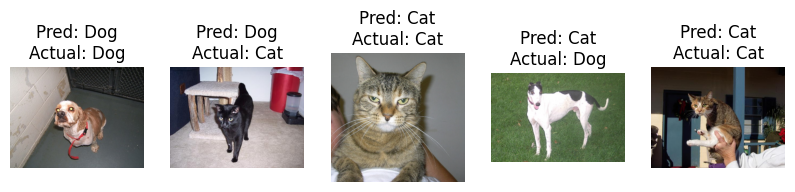

In [ ]:
indices = np.random.choice(len(X_test), 5, replace=False)

plt.figure(figsize=(10, 5))

for i, idx in enumerate(indices):
    actual_label = "Cat" if y_test[idx] == 0 else "Dog"
    predicted_label = "Cat" if y_pred[idx] == 0 else "Dog"

    # Find the corresponding image filename
    img_path = os.path.join(cat_path if y_test[idx] == 0 else dog_path, os.listdir(cat_path if y_test[idx] == 0 else dog_path)[idx])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Pred: {predicted_label}\nActual: {actual_label}")

plt.show()
